In [1]:
# Step 1. 인물모드 직접 해보기
# 최소 3장 이상의 인물모드 사진
## blur, 배경 교체 크로마키

# 이하 모든 작업은 노드 기준으로 작성 및 테스트 하였음
def selfie_with_blur():# blur
    import os
    import urllib
    import cv2
    import numpy as np
    from pixellib.semantic import semantic_segmentation
    from matplotlib import pyplot as plt
    # warning 메시지 무시하기
    import warnings
    warnings.filterwarnings(action='ignore')
        
    # 이미지 읽기
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'
    img_orig = cv2.imread(img_path)
    
    # 모델 저장 경로
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    # 모델 파일 저장 경로
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
      
    # segmentation 모델 생성
    model = semantic_segmentation()
    # .h5 파일 이용해서 모델 로드
    model.load_pascalvoc_model(model_file)
        
    # 원본 이미지에 대한 segment값 추출 (model 이용해서)
    segvalues, output = model.segmentAsPascalvoc(img_path)
        
    # segmentation 컬러 설정; BRG 채널 기준으로 세팅
    seg_color = (128,128,192)
    
    # seg_color로 구성된 마스크 만들기
    seg_map = np.all(output==seg_color, axis=-1)
    
    # True: 255, False: 0으로 세팅
    img_mask = seg_map.astype(np.uint8) * 255

    # img_mask의 색상을 colormap 형태로 변경
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 블러된 이미지 만들기
    blur_kernel_size = (15, 15)
    img_orig_blur = cv2.blur(img_orig, blur_kernel_size)

    # 흐려진 이미지에서 배경만 추출
    ## segmenation mask 사용
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    # segmentation mask의 이미지 반전
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    
    # 배경 추출; blur된 배경만 획득함
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # 배경 영상과 사람 영상 합치기
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    
    # 합쳐진 이미지 확인
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

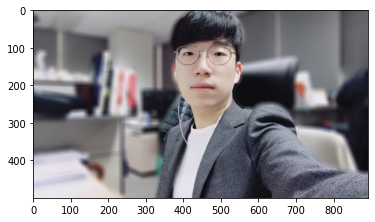

In [2]:
selfie_with_blur()

In [3]:
# Step 1. 인물모드 직접 해보기
# 최소 3장 이상의 인물모드 사진
## blur, 배경 교체 크로마키

# 동일하게 이미지를 부르고 segvalues를 얻을건데 왜 args 개수가 다르지?..
def img_with_chroma_key():# chroma key
    import os
    import urllib
    import cv2
    import numpy as np
    from pixellib.semantic import semantic_segmentation
    from matplotlib import pyplot as plt
    # warning 메시지 무시하기
    import warnings
    warnings.filterwarnings(action='ignore')
    
    # 이미지 읽기
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/test_cat.png'
    img_orig = cv2.imread(img_path)
    
#     plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
#     plt.show()
    # 과연?
#     img_orig = np.asarray(img_orig)
    
    # 모델 저장 경로
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    # 모델 파일 저장 경로
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
      
    # segmentation 모델 생성
    model = semantic_segmentation()
    # .h5 파일 이용해서 모델 로드
    model.load_pascalvoc_model(model_file)
        
    # 원본 이미지에 대한 segment값 추출 (model 이용해서)
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    #pascalvoc 데이터의 라벨종류
    LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]
    len(LABEL_NAMES)
    
    plt.imshow(output)
    plt.show()
    
img_with_chroma_key()

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
# Step 2. 사진에서 문제점 찾기
# 어떤 문제가 있는지 표시하기

In [ ]:
# Step 3. 해결 방법을 제안해 보기

"""
Vison transformer를 사용한 알고리즘이 있는것 같다.(SETR)
https://fudan-zvg.github.io/SETR/

transformer 아키텍쳐?
- 딥러닝 아키텍처의 한 유형

"""